# Perkenalan

## Data
Dataset yang digunakan adalah Uber vs Lyft Dataset New  York. Dataset ini berisi record perjalanan taksi online Uber dan Lyft di New York, USA. Terdapat 57 atribut yang termuat dalam dataset ini. Dataset ini didapat dari sumber : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/code

## Objective
Objective yang ingin dicapat pada analisis ini, yaitu:
1. Mampu memahami konsep regression dengan Linear Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi



## Import Libraries

In [38]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
import plotly.express as px

## Data Loading

In [39]:
# Load a CSV file containing rideshare data
df = pd.read_csv('dataset/rideshare_kaggle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Exploratory data analysis

In [40]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


**Check for missing value**

In [41]:
# Calculate the count of missing values in each column of the DataFrame
missing_count = df.isna().sum()

# Display the count of missing values for each column
missing_count

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**correlation**

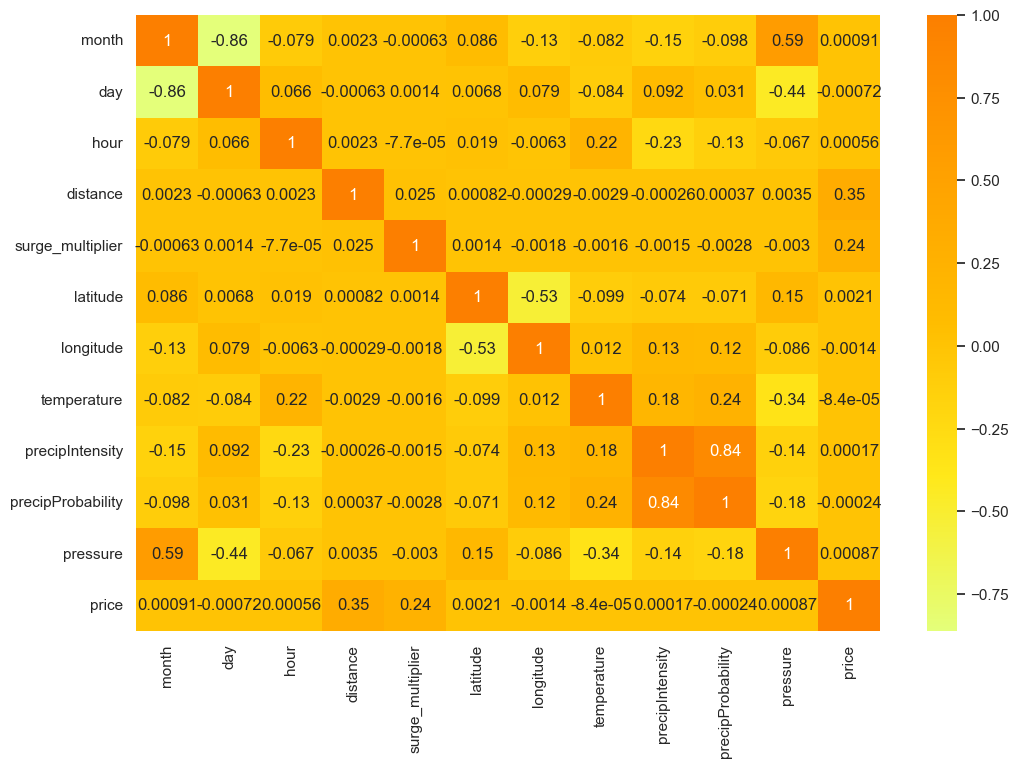

In [42]:
# correlation plot
analysis_cols = ["month", "day", "hour", "distance", "surge_multiplier",
        "latitude", "longitude", "temperature", "precipIntensity", "precipProbability", "pressure", "price"]
corr = df[analysis_cols].corr()

# Set the figure size for the correlation plot
plt.figure(figsize=(12, 8))  pp

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(corr, cmap='Wistia', annot=True);

# Display the plot
plt.show()


Grafik ini menampilkan matriks korelasi antara berbagai variabel yang terdapat dalam dataset. Nilai yang mendekati 1 atau -1 menunjukkan korelasi yang kuat antara dua variabel, dengan tanda positif menandakan korelasi positif dan tanda negatif menandakan korelasi negatif. Sebagai contoh, antara "month" dan "day", korelasinya adalah -0.86, menunjukkan adanya korelasi negatif yang kuat. Di sisi lain, variabel "distance" dan "price" memiliki korelasi positif sebesar 0.35, mengindikasikan bahwa saat jarak bertambah, harga cenderung meningkat. Terdapat beberapa variabel yang tidak memiliki korelasi yang signifikan, seperti ditunjukkan oleh angka yang mendekati nol. Korelasi di antara variabel-variabel ini memberikan wawasan tentang bagaimana satu variabel mungkin mempengaruhi yang lainnya dalam konteks dataset ini.

**scatter plot to visualize the different effect of surging**

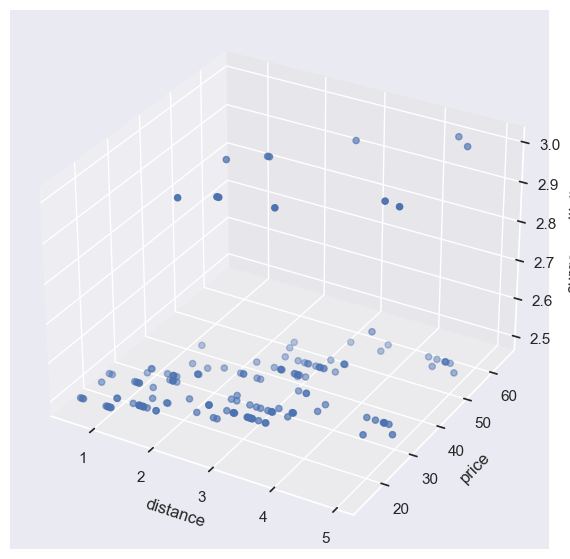

In [43]:
surge_data = df[df["surge_multiplier"]>2.0]
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111, projection = '3d')

x = surge_data['distance']
y = surge_data['price']
z = surge_data['surge_multiplier']

ax.set_xlabel("distance")
ax.set_ylabel("price")
ax.set_zlabel("surge_multiplier")

ax.scatter(x, y, z)

plt.show()

Grafik tiga dimensi ini menggambarkan hubungan antara jarak dan harga dengan distribusi titik-titik pada sumbu vertikal lainnya. Dari grafik, dapat diamati bahwa sebagian besar data berkumpul di sekitar jarak pendek hingga menengah dengan harga yang bervariasi. Namun, ketika jarak bertambah, titik-titik cenderung tersebar lebih luas, mengindikasikan bahwa ada variasi harga yang lebih besar untuk jarak yang lebih panjang. Meskipun ada beberapa titik pada jarak yang lebih jauh dengan harga yang lebih rendah, mayoritas titik menunjukkan kecenderungan bahwa harga meningkat seiring dengan pertambahan jarak. Grafik ini memberikan visualisasi yang jelas tentang bagaimana harga berfluktuasi berdasarkan jarak dan variabel lainnya yang direpresentasikan oleh sumbu vertikal ketiga.

# Data Preprocessing

Remove missing price row and duplicates

In [44]:
# Remove rows with missing (NaN) values from the DataFrame
df = df.dropna()
# Remove duplicate rows from the DataFrame and modify it in-place
df.drop_duplicates(inplace=True)

Calculate central tendency and show other info

In [45]:
# Extract the 'price' column from the DataFrame and assign it to the variable 'price'
price = df['price']

# Calculate and print the mean (average) of the 'price' column
print("Mean : ", price.mean())

# Calculate and print the median of the 'price' column
print("Median : ", price.median())

# Calculate and print the mode (most frequent value) of the 'price' column
print("Mode : ", price.mode())

# Generate and display a summary of basic statistics for the 'price' column
price.describe()


Mean :  16.545125490614065
Median :  13.5
Mode :  0    7.0
Name: price, dtype: float64


count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

Grouping and query

In [46]:
# Group the DataFrame 'df' by the 'destination' column and calculate the sum of prices for each group
destination_prices = df.groupby('destination')['price'].sum()

In [47]:
destination_prices.head()

destination
Back Bay               862218.00
Beacon Hill            858562.00
Boston University     1007172.35
Fenway                 964772.50
Financial District     977964.00
Name: price, dtype: float64

Plot based on destination and price grouping 

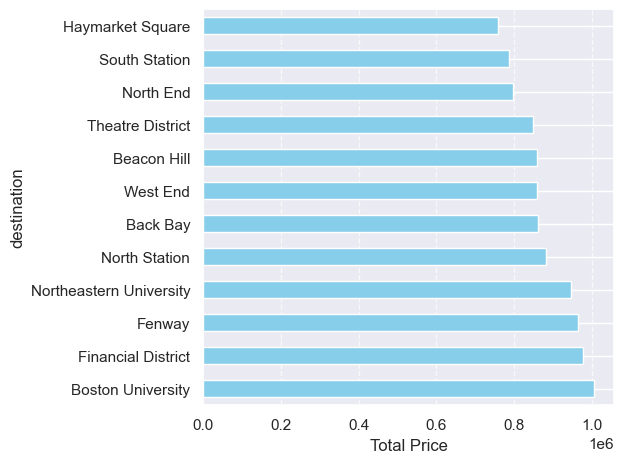

In [48]:
# Sort the 'destination_prices' data in descending order, based on the total prices
destination_prices = destination_prices.sort_values(ascending=False)

# Create a new figure for plotting
plt.figure()

# Plot the destination prices as a horizontal bar chart
destination_prices.plot(kind='barh', color='skyblue')

# Add grid lines for the x-axis with a dashed line style and transparency
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Label for the y-axis (vertical axis)
plt.xlabel('Total Price')

# Ensure the plot layout is tight
plt.tight_layout()

# Display the plot
plt.show()


Filter necessary columns 

In [49]:
# Select and retain specific columns as features in the DataFrame
features_cols = ["month","day","hour","distance","surge_multiplier","cab_type",
            "latitude","longitude","temperature","precipIntensity","precipProbability",
            "humidity","windSpeed","windGust","dewPoint","pressure","ozone","price"]
df = df[features_cols]

Remove outliers

In [50]:
# Calculate the quartile (Q1) (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# identifying outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_lower = df['price'] > lower_limit
outliers_upper = df['price'] < upper_limit

# Filter the DataFrame to remove outliers based on the lower and upper limits
df = df[outliers_lower & outliers_upper]


Plot Hourly cab type count comparison

In [51]:
# Group the DataFrame 'df' by 'hour' and 'cab_type', and count the occurrences, then reset the index
hour_df = df.groupby(by=["hour", "cab_type"]).size().reset_index(name="counts")

# Create a bar plot using Plotly Express
px.bar(data_frame=hour_df, x="hour", y="counts", color="cab_type", barmode="group")

Grafik ini menggambarkan distribusi jumlah perjalanan untuk dua layanan berbagi tumpangan yang terkenal, Lyft dan Uber, sepanjang berbagai jam dalam sehari. Kedua layanan menunjukkan permintaan yang relatif konsisten sepanjang hari, dengan setiap jam melihat sekitar 12k hingga 16k perjalanan. Namun, beberapa variasi ringan dapat diamati. Misalnya, pada jam-jam awal, sekitar pukul 0, terdapat penurunan yang mencolok dalam jumlah perjalanan Lyft dibandingkan dengan Uber. Data menunjukkan bahwa meskipun permintaan untuk kedua layanan tetap signifikan sepanjang hari, ada jam-jam tertentu di mana satu layanan mungkin lebih disukai daripada yang lain. Pengamatan ini dapat menjadi kunci untuk memahami preferensi pengguna dan waktu permintaan puncak untuk kedua perusahaan.

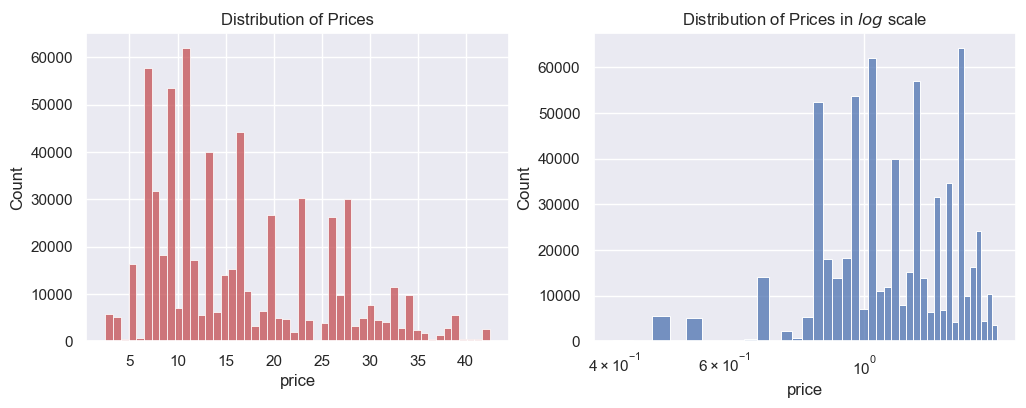

In [52]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Prices')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['price']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Prices in $log$ scale')
ax.set_xscale('log');

Dua grafik histogram ini menampilkan distribusi harga. Grafik pertama menunjukkan distribusi harga dalam skala normal, sedangkan grafik kedua menunjukkan distribusi harga dalam skala logaritmik.

Dari grafik pertama, kita bisa melihat bahwa sebagian besar harga berkisar antara 5 hingga 25, dengan puncak tertinggi pada rentang harga sekitar 10-15. Ada beberapa harga yang lebih tinggi tetapi frekuensinya lebih rendah, khususnya di atas 30.

Dalam grafik kedua dengan skala logaritmik, distribusi harga tampak lebih tersebar, yang menunjukkan bahwa penggunaan skala log memperjelas beberapa karakteristik distribusi yang mungkin kurang jelas dalam skala normal. Hal ini khususnya membantu dalam mengidentifikasi frekuensi dari harga yang sangat rendah atau sangat tinggi.

Secara keseluruhan, kedua grafik ini menawarkan pandangan berbeda tentang bagaimana harga didistribusikan, dengan grafik logaritmik memberikan perspektif tambahan tentang distribusi harga di ujung yang lebih ekstrim.

Text(0.5, 1.0, 'Violin plot of price vs cab type')

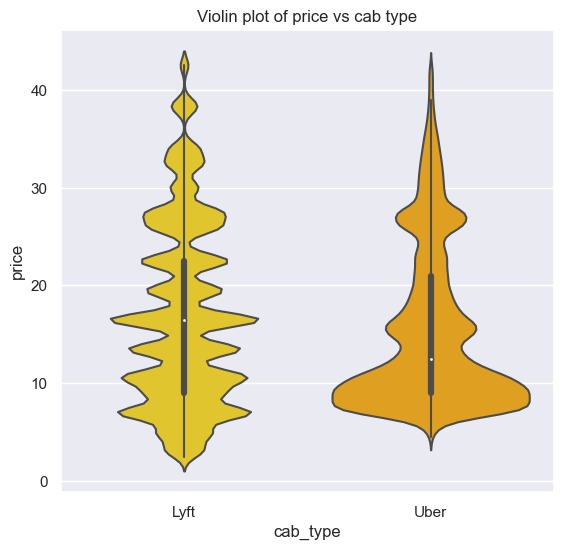

In [53]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='cab_type', y='price',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of price vs cab type')

Dari grafik ini kita dapat menyimpulkan:

Lyft:

Memiliki variasi harga yang lebih luas dibandingkan dengan Uber.
Sebagian besar harga berada di kisaran 10 hingga 30.
Ada beberapa puncak pada distribusi harga, yang menunjukkan adanya beberapa mode harga yang populer.
Uber:

Distribusi harga tampak lebih terpusat dengan puncak yang lebih tajam.
Sebagian besar harga berkisar antara 15 hingga 25.
Meskipun demikian, ada beberapa harga yang lebih rendah atau lebih tinggi namun frekuensinya lebih sedikit.
Dari grafik ini, kita bisa melihat bahwa meskipun kedua perusahaan memiliki rentang harga yang serupa, distribusi dan variasi harga mereka berbeda. Lyft tampaknya menawarkan pilihan harga yang lebih beragam dibandingkan dengan Uber yang cenderung lebih konsisten dalam kisaran tertentu.

Plotting linear regression with 500 head data

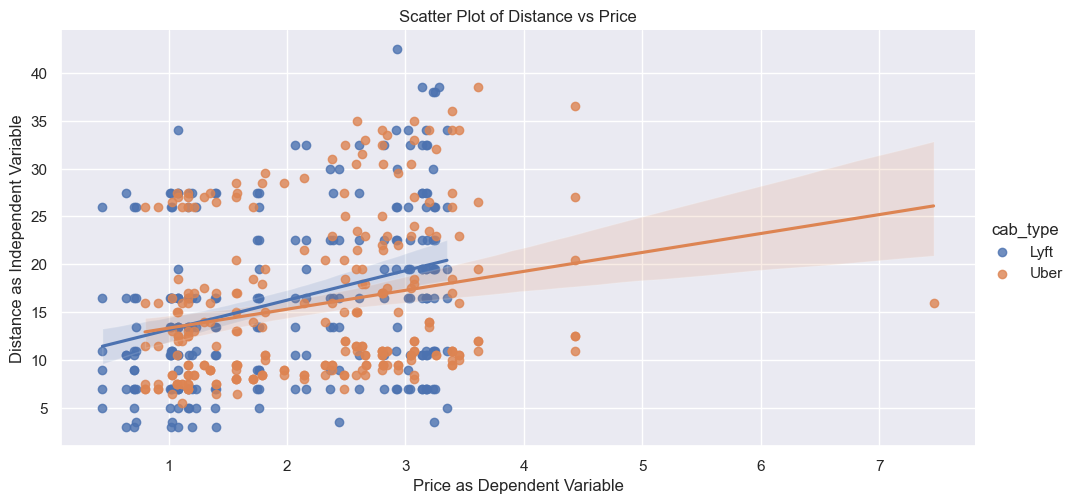

In [54]:
# Create a scatter plot with linear regression lines using Seaborn (sns.lmplot)
sns.lmplot(data=df.head(500), x='distance', y='price', hue='cab_type', aspect=2)

plt.title('Scatter Plot of Distance vs Price')
plt.xlabel('Price as Dependent Variable')
plt.ylabel('Distance as Independent Variable')

plt.show()


Dalam grafik scatter antara jarak dan harga untuk dua jenis taksi, Lyft dan Uber, terdapat korelasi positif; artinya saat jarak meningkat, harga cenderung naik. Lyft menunjukkan kenaikan harga yang lebih tajam per satuan jarak dibandingkan Uber. Namun, Lyft memiliki variasi harga yang lebih besar dibandingkan Uber untuk jarak yang sama. Sebagian besar data berkumpul pada rentang harga 1 hingga 4 unit, menunjukkan sebagian besar perjalanan berada dalam kisaran harga tersebut.

Preparing test train split

In [55]:
# Extract the dependent variable 'price' and assign it to 'y'
y = df['price']

# Extract the independent variables and assign them to 'x'
x = df[["distance", "surge_multiplier", "distance"]]


In [56]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelling

Model Building

In [57]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
LR = LinearRegression().fit(x_train, y_train)


In [58]:
# Use the trained LinearRegression model (LR) to make predictions on the testing data (x_test)
y_prediction = LR.predict(x_test)

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Predicting the R-squared (R2) score to evaluate the model's goodness of fit
score = r2_score(y_test, y_prediction)
print('r2 score is', score)

# Calculating and printing the mean squared error (MSE)
mse = mean_squared_error(y_test, y_prediction)
print('mean_squared_error is', mse)

# Calculating and printing the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('root_mean_squared_error is', rmse)


r2 score is 0.12010168295854262
mean_squared_error is 67.64720229216647
root_mean_squared_error is 8.224791930022697


In [60]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant (intercept) to the independent variables
X2 = sm.add_constant(x)

# Create an Ordinary Least Squares (OLS) model with the dependent variable 'y' and the augmented independent variables
est = sm.OLS(y, X2)

# Fit the OLS model to the data and obtain the results
est2 = est.fit()

# Print a summary of the regression results, including statistics such as coefficients, R-squared, and p-values
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                 4.346e+04
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:51:19   Log-Likelihood:            -2.2297e+06
No. Observations:              632387   AIC:                         4.459e+06
Df Residuals:                  632384   BIC:                         4.459e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9983      0.128  

Hasil regresi OLS menunjukkan hubungan antara variabel 'distance' dan 'surge_multiplier' terhadap variabel dependen 'price'. Koefisien untuk 'distance' adalah 1.2475 dengan kesalahan standar 0.005 dan signifikansi pada level 0.000. Ini berarti untuk setiap kenaikan 1 unit dalam 'distance', harga rata-rata meningkat sebesar 1.2475 unit, asumsi variabel lain tetap. Sementara itu, koefisien untuk 'surge_multiplier' adalah 14.6451 dengan kesalahan standar 0.124 dan signifikansi pada level 0.000, menandakan bahwa 'surge_multiplier' memiliki pengaruh positif yang signifikan terhadap harga. R-squared model ini adalah 0.121, yang berarti model ini menjelaskan sekitar 12.1% variasi dari variabel dependen 'price'. Selain itu, nilai Durbin-Watson sebesar 2.245 menunjukkan tidak adanya autokorelasi. Statistik Jarque-Bera menunjukkan bahwa residu model tidak terdistribusi normal.

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

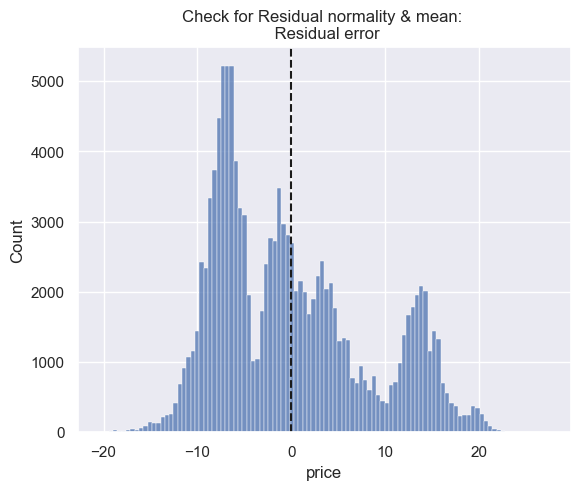

In [65]:
pf = plt.figure(figsize=(14, 5))
ax = f.add_subplot(122)
sns.histplot((y_test - y_prediction), ax=ax, color='b')
ax.axvline((y_test - y_prediction).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')


Grafik ini menunjukkan distribusi kesalahan residual dari model regresi. Idealnya, kesalahan residual harus terdistribusi normal dengan rata-rata nol. Berdasarkan grafik, sebagian besar kesalahan berkumpul di sekitar nol, namun distribusinya tampak sedikit miring ke kiri. Garis putus-putus menunjukkan rata-rata kesalahan residual, yang tampaknya mendekati nol, tetapi distribusi tidak sempurna simetris. Ini menandakan bahwa mungkin ada beberapa penyimpangan non-linearitas atau variabilitas yang belum dijelaskan oleh model.

# Analysis

Dataset (metodologi)
Dataset yang digunakan dalam penelitian ini berasal dari platform Kaggle dengan judul "Uber and Lyft Dataset Boston, MA". Dataset ini membandingkan layanan Uber dan Lyft dengan fokus pada variabel harga dan waktu. Dataset tersebut didapatkan dari Kaggle pada November 2023 melalui laman https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma.

Dataset ini mudah digunakan karena memiliki keterangan yang cukup jelas namun mengandung banyak nilai yang hilang (NA). Dataset ini menawarkan informasi harga yang bervariasi berdasarkan jam dalam sehari. Sebagai nilai tambah, dataset ini juga mencakup data cuaca yang sesuai untuk jam tersebut dengan ringkasan singkat tentang kondisi cuaca. Faktor cuaca lain yang menjadi pertimbangan dalam dataset ini termasuk suhu, kecepatan angin, dan waktu matahari terbenam.

Dari analisis regresi linier, kita dapat mengambil beberapa kesimpulan yang signifikan. Pertama, melalui grafik distribusi perjalanan Lyft dan Uber sepanjang hari, kita melihat bahwa ada preferensi pengguna yang berubah-ubah, terutama pada jam-jam tertentu. Hal ini menunjukkan bahwa pemahaman jam-jam puncak untuk masing-masing layanan adalah kunci dalam pengelolaan permintaan. Selanjutnya, analisis korelasi variabel dalam dataset memberikan wawasan tentang bagaimana satu variabel dapat memengaruhi yang lainnya. Misalnya, korelasi negatif antara "month" dan "day" mengindikasikan fluktuasi permintaan sepanjang bulan. Grafik tiga dimensi antara jarak dan harga menyoroti bahwa harga cenderung meningkat seiring dengan pertambahan jarak, dan grafik violin menunjukkan bahwa Lyft memiliki variasi harga yang lebih besar daripada Uber. Selain itu, analisis regresi OLS memberikan koefisien yang mengungkapkan pengaruh signifikan 'distance' dan 'surge_multiplier' terhadap harga, dengan R-squared sekitar 12.1%. Namun, kesalahan residual yang tidak terdistribusi secara normal mengindikasikan adanya non-linearitas atau variabilitas yang belum dijelaskan oleh model.

Kesimpulannya, analisis ini memberikan wawasan yang berharga tentang preferensi pengguna, korelasi variabel, hubungan antara jarak dan harga, serta pengaruh variabel-variabel tertentu terhadap harga layanan tumpangan. Informasi ini dapat digunakan oleh perusahaan seperti Lyft dan Uber untuk meningkatkan strategi pemasaran, penentuan harga, dan manajemen permintaan, serta untuk mengoptimalkan pengalaman pengguna. Namun, perlu diperhatikan bahwa model regresi mungkin perlu ditingkatkan untuk mengatasi penyimpangan dari distribusi normal dalam kesalahan residual.